C:\Users\Dien.Truong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8687 - loss: 0.4195 - val_accuracy: 0.9773 - val_loss: 0.0765
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9813 - loss: 0.0599 - val_accuracy: 0.9861 - val_loss: 0.0478
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9869 - val_loss: 0.0409
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9925 - loss: 0.0254 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9943 - loss: 0.0198 - val_accuracy: 0.9881 - val_loss: 0.0385
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9949 - loss: 0.0144 - val_accuracy: 0.9875 - val_loss: 0.0418
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9961 - loss: 0.0113 - val_accuracy: 0.9899 - val_loss: 0.0361
Epoch 8/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9970 - loss: 0.0102 - 

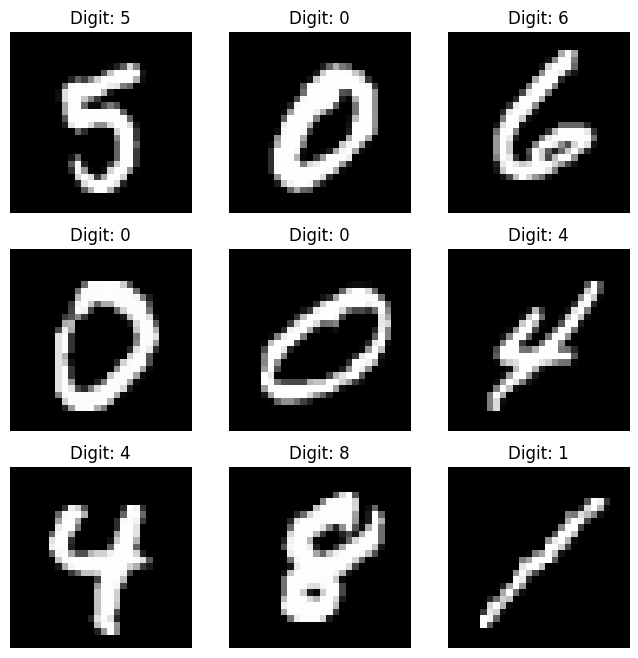

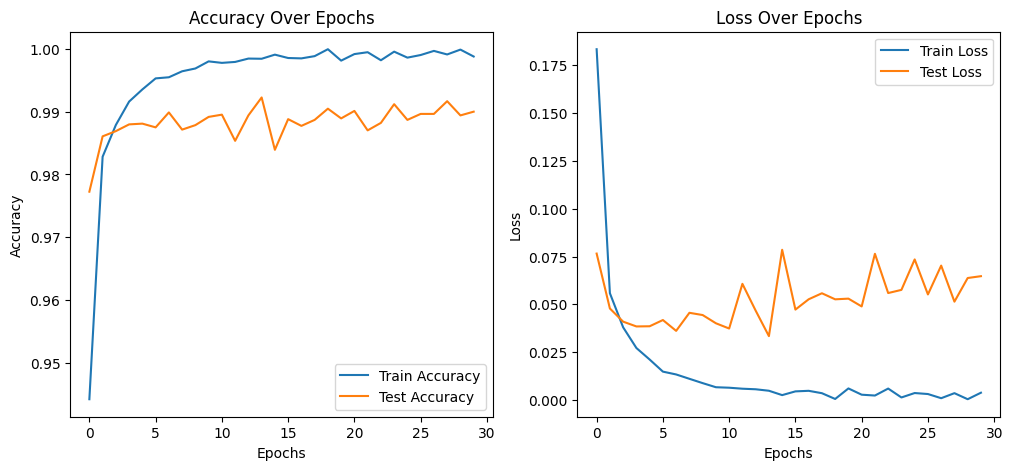

Train Accuracy: 99.96%
Train Loss: 0.0013
Test Accuracy: 99.00%
Test Loss: 0.0647
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       0.99      1.00      0.99       909
           2       0.99      0.99      0.99       846
           3       0.99      0.99      0.99       937
           4       0.99      0.98      0.99       839
           5       0.99      0.98      0.99       702
           6       0.98      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.99      0.98      0.99       835
           9       0.98      0.99      0.98       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load dataset
file_path = './data.csv'
data = pd.read_csv(file_path)

# Tách nhãn và dữ liệu ảnh
X = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Reshape và chuẩn hóa
Y = data.iloc[:, 0].values.reshape(-1, 1)

# One-hot encoding nhãn
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y)

# Chia tập train/test theo tỷ lệ 80% train, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Xây dựng mô hình CNN
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

# Đánh giá mô hình
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)

# Hiển thị một số ảnh ngẫu nhiên từ tập dữ liệu kèm nhãn
indices = np.random.choice(len(X_train), 9, replace=False)  # Chọn ngẫu nhiên 9 ảnh
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for i, idx in enumerate(indices):
    img = X_train[idx].reshape(28, 28)
    label_index = np.argmax(Y_train[idx])
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Digit: {label_index}")
plt.show()

# Vẽ đồ thị accuracy và loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

from sklearn.metrics import classification_report

# Dự đoán nhãn trên tập test
Y_pred_probs = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred_probs, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# In báo cáo phân loại
print("\nClassification Report:")
print(classification_report(Y_true_classes, Y_pred_classes))


# --- Bắt đầu phần trực quan hóa ---

import numpy as np

labels = [str(i) for i in range(10)]

from sklearn.metrics import classification_report

report = classification_report(Y_true_classes, Y_pred_classes, output_dict=True)

precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score', color='salmon')

ax.set_xlabel('Lớp')
ax.set_ylabel('Giá trị')
ax.set_title('Precision, Recall, F1-score theo từng lớp')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


In [4]:
model.save("mnist_model.h5")  # Lưu mô hình

1. Các độ đo trong Classification Report
Độ đo	Ý nghĩa
Accuracy	Tỉ lệ dự đoán đúng trên tổng số mẫu.
Precision	Tỉ lệ dự đoán đúng trên tổng số dự đoán thuộc lớp đó (Độ chính xác trong dự đoán lớp đó).
Recall	Tỉ lệ dự đoán đúng trên tổng số mẫu thực sự thuộc lớp đó (Khả năng tìm đủ mẫu lớp đó).
F1-score	Trung bình điều hòa của Precision và Recall, thể hiện cân bằng giữa 2 độ đo trên.
Support	Số lượng mẫu thực tế thuộc từng lớp trong tập kiểm tra.

2. Nhận xét kết quả của mô hình
Accuracy ~99%: Mô hình dự đoán đúng tổng thể rất cao.

Precision, Recall, F1-score cho từng lớp đều đạt 0.98 - 1.00: mô hình vừa chính xác vừa đầy đủ khi nhận diện từng chữ số.

Số lượng mẫu của từng lớp khá đều nhau (700 - 900), giảm thiểu nguy cơ mất cân bằng dữ liệu.

3. Phân tích trường hợp Accuracy cao nhưng F1-score thấp
F1-score thấp trong khi accuracy cao thường do:

Dữ liệu mất cân bằng: Một số lớp có nhiều mẫu, một số rất ít. Mô hình dễ đoán đúng các lớp phổ biến, bỏ sót các lớp ít mẫu.

Precision hoặc Recall thấp ở một số lớp: Ví dụ mô hình có thể bỏ sót nhiều mẫu lớp ít phổ biến (Recall thấp) hoặc dự đoán nhầm (Precision thấp).

Vì Accuracy chỉ tính tổng số dự đoán đúng trên tổng số mẫu, nó không phản ánh chi tiết hiệu quả với từng lớp như F1-score.